## FLIRT - t1ce + mask

### PGBM 001

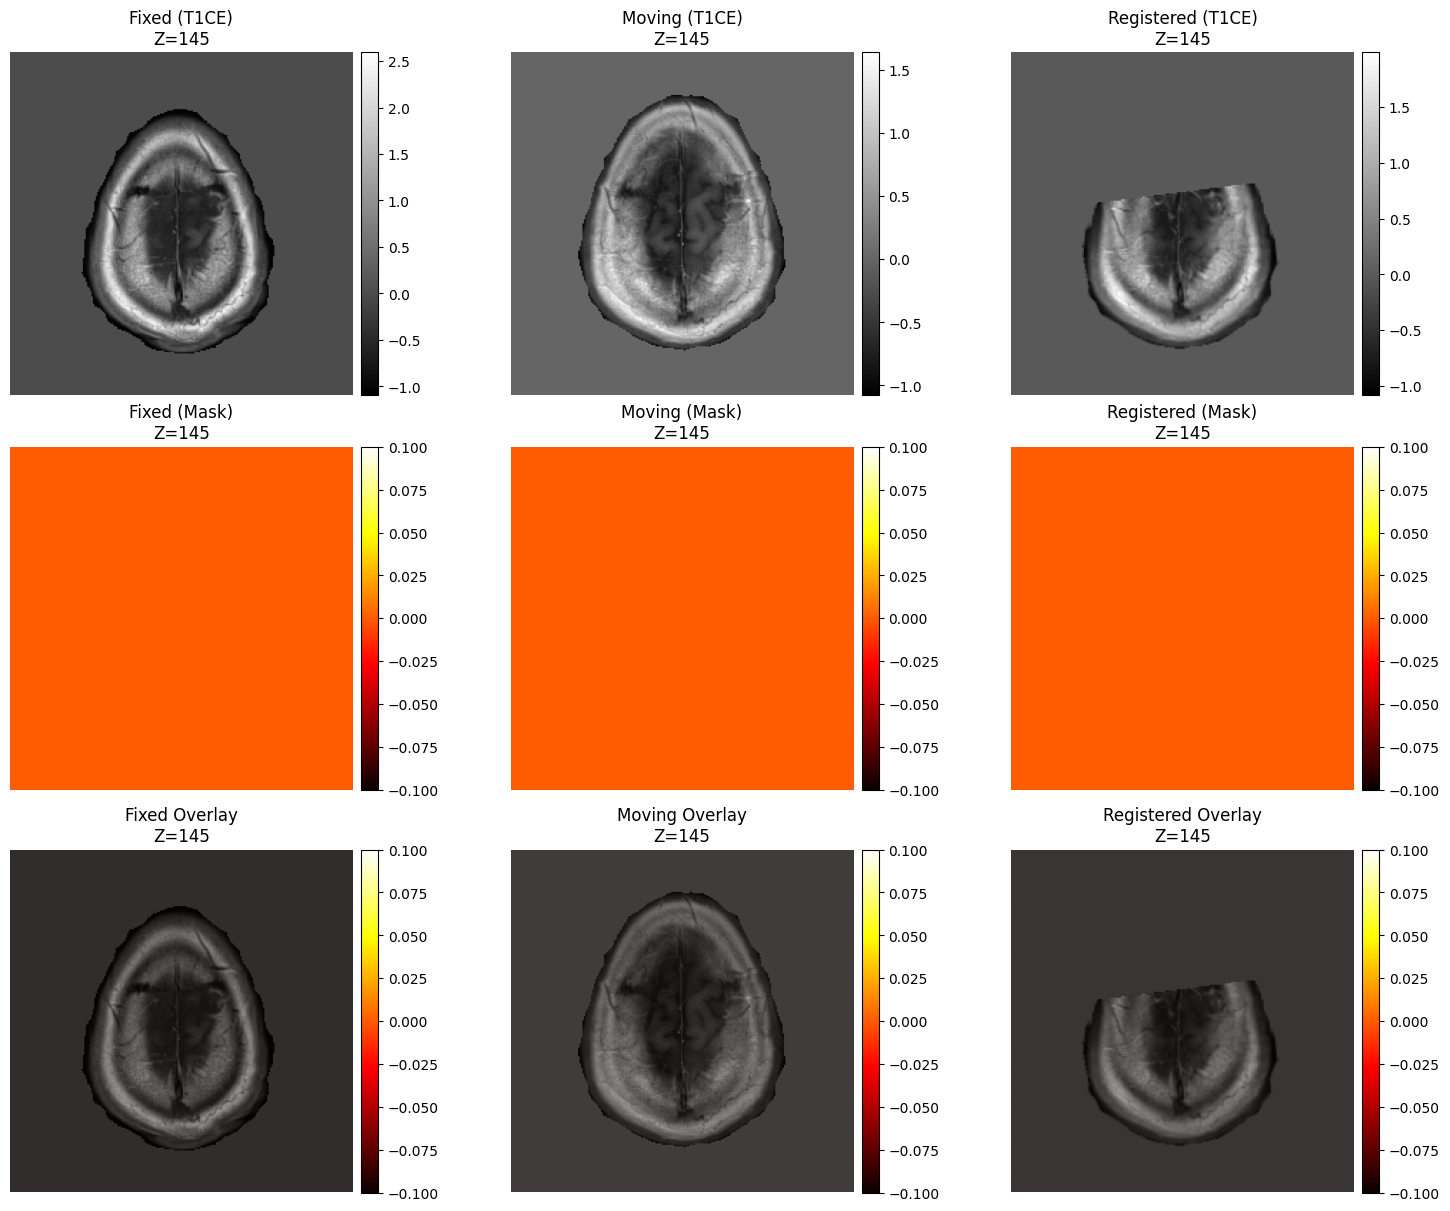

In [27]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_registration_with_overlay(preproc_root, reg_root, case_id,
                                   fixed_date, moving_date,
                                   slice_z=145,
                                   img_mod="t1ce_brain.nii.gz",
                                   reg_img="t1ce2fixed_affine.nii.gz",
                                   mask_name="mask.nii.gz",
                                   reg_mask="mask2fixed_affine.nii.gz"):
    """
    Displays 3x3 grid:
    Row 1: T1CE Fixed, Moving, Registered images
    Row 2: Mask Fixed, Moving, Registered masks
    Row 3: Overlay of image+mask for Fixed, Moving, Registered
    """
    # Paths
    fixed_img_path   = os.path.join(reg_root, case_id, fixed_date,  img_mod)
    moving_img_path  = os.path.join(reg_root, case_id, moving_date, img_mod)
    reg_img_path     = os.path.join(reg_root, case_id, moving_date, reg_img)
    fixed_mask_path  = os.path.join(preproc_root, case_id, fixed_date,  mask_name)
    moving_mask_path = os.path.join(preproc_root, case_id, moving_date, mask_name)
    reg_mask_path    = os.path.join(reg_root, case_id, moving_date, reg_mask)

    # Load volumes
    fixed_img   = nib.load(fixed_img_path).get_fdata()
    moving_img  = nib.load(moving_img_path).get_fdata()
    reg_img_vol = nib.load(reg_img_path).get_fdata()
    fixed_mask  = nib.load(fixed_mask_path).get_fdata()
    moving_mask = nib.load(moving_mask_path).get_fdata()
    reg_mask_vol= nib.load(reg_mask_path).get_fdata()

    # Select slice
    Z, Y, X = fixed_img.shape
    z0 = slice_z if slice_z is not None else Z // 2

    img_slices  = [fixed_img[z0,:,:], moving_img[z0,:,:], reg_img_vol[z0,:,:]]
    mask_slices = [fixed_mask[z0,:,:], moving_mask[z0,:,:], reg_mask_vol[z0,:,:]]

    # Plot 3x3
    fig, axes = plt.subplots(3, 3, figsize=(15, 12), constrained_layout=True)
    titles = ["Fixed", "Moving", "Registered"]

    # Row 1: images
    for i, ax in enumerate(axes[0]):
        im = ax.imshow(img_slices[i], cmap="gray", aspect="equal")
        ax.set_title(f"{titles[i]} (T1CE)\nZ={z0}")
        ax.axis("off")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.02)

    # Row 2: masks
    for i, ax in enumerate(axes[1]):
        im = ax.imshow(mask_slices[i], cmap="hot", aspect="equal")
        ax.set_title(f"{titles[i]} (Mask)\nZ={z0}")
        ax.axis("off")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.02)

    # Row 3: overlay
    for i, ax in enumerate(axes[2]):
        ax.imshow(img_slices[i], cmap="gray", aspect="equal")
        ax.imshow(mask_slices[i], cmap="hot", alpha=0.4, aspect="equal")
        ax.set_title(f"{titles[i]} Overlay\nZ={z0}")
        ax.axis("off")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.02)

    plt.show()


# ───────── 사용 예 ─────────
preproc_root = "/mnt/ssd/brain-tumor-prediction/data/btp_preproc"
reg_root     = "/mnt/ssd/brain-tumor-prediction/data/btp_reg_flirt_t1ce"
case_id      = "PGBM-001"
fixed_date   = "1991-11-19"
moving_date  = "1992-04-02"

show_registration_with_overlay(preproc_root, reg_root, case_id,
                               fixed_date, moving_date,
                               slice_z=145)


### PGBM 002

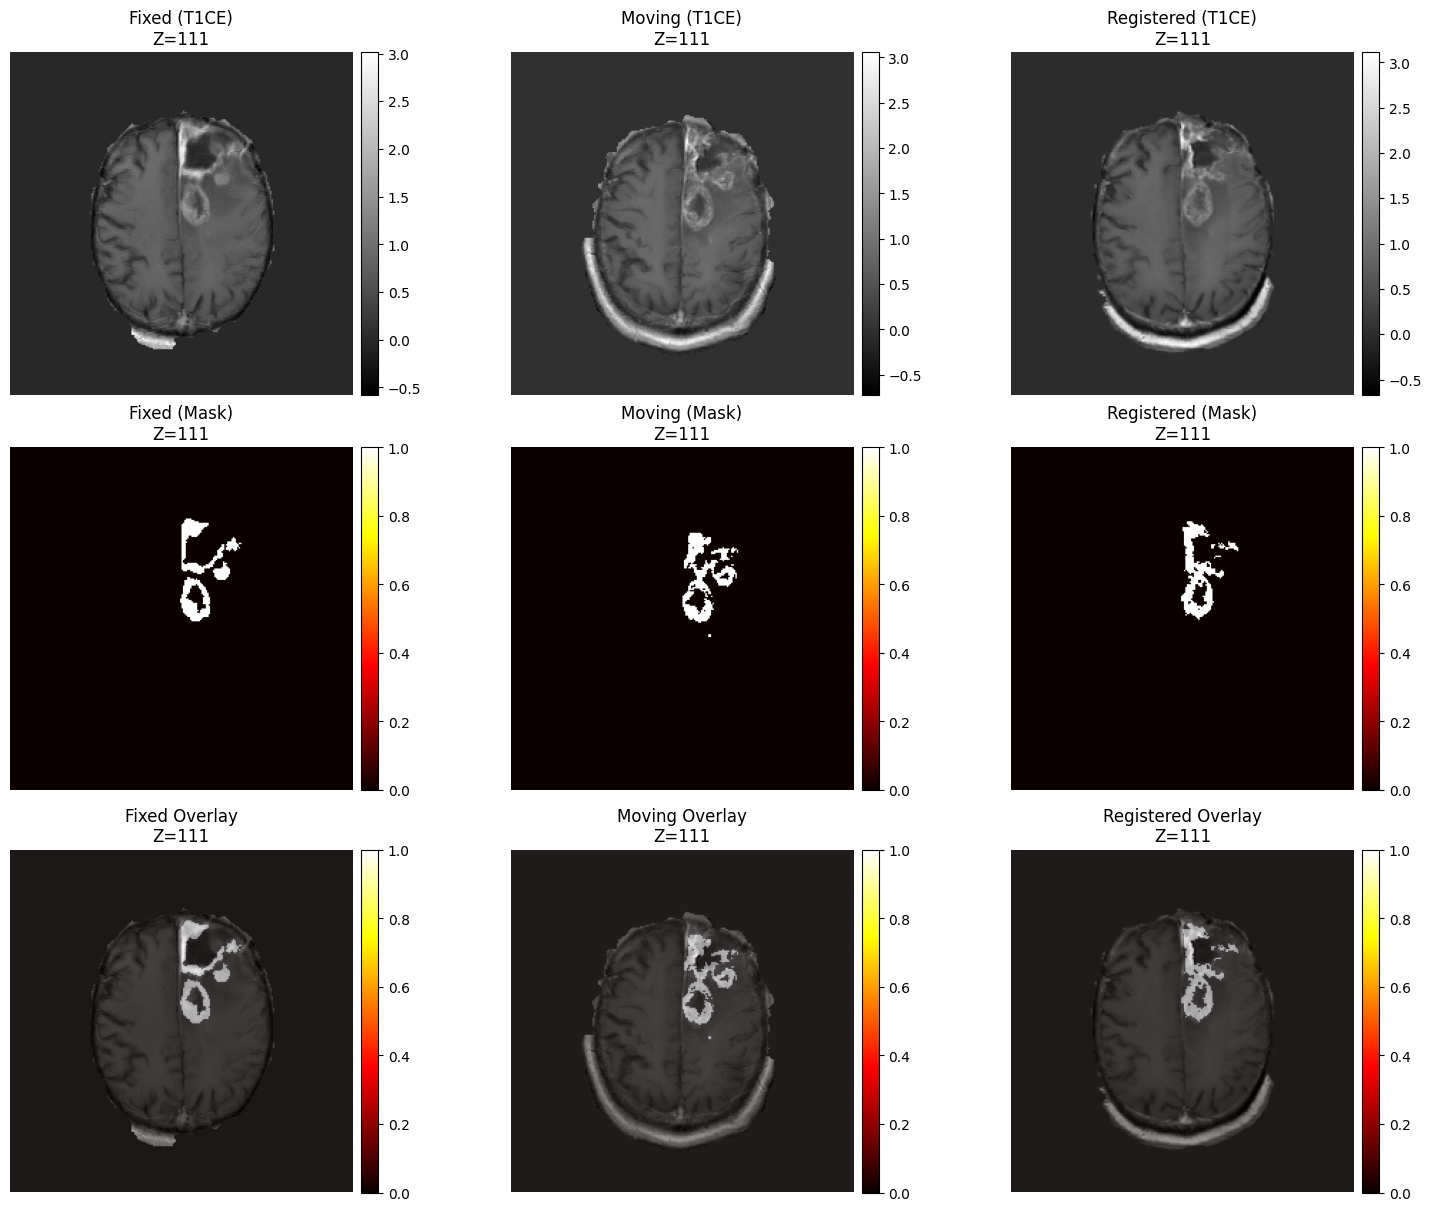

In [17]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_registration_with_overlay(preproc_root, reg_root, case_id,
                                   fixed_date, moving_date,
                                   slice_z=111,
                                   img_mod="t1ce_brain.nii.gz",
                                   reg_img="t1ce2fixed_affine.nii.gz",
                                   mask_name="mask.nii.gz",
                                   reg_mask="mask2fixed_affine.nii.gz"):
    """
    Displays 3x3 grid:
    Row 1: T1CE Fixed, Moving, Registered images
    Row 2: Mask Fixed, Moving, Registered masks
    Row 3: Overlay of image+mask for Fixed, Moving, Registered
    """
    # Paths
    fixed_img_path   = os.path.join(reg_root, case_id, fixed_date,  img_mod)
    moving_img_path  = os.path.join(reg_root, case_id, moving_date, img_mod)
    reg_img_path     = os.path.join(reg_root, case_id, moving_date, reg_img)
    fixed_mask_path  = os.path.join(preproc_root, case_id, fixed_date,  mask_name)
    moving_mask_path = os.path.join(preproc_root, case_id, moving_date, mask_name)
    reg_mask_path    = os.path.join(reg_root, case_id, moving_date, reg_mask)

    # Load volumes
    fixed_img   = nib.load(fixed_img_path).get_fdata()
    moving_img  = nib.load(moving_img_path).get_fdata()
    reg_img_vol = nib.load(reg_img_path).get_fdata()
    fixed_mask  = nib.load(fixed_mask_path).get_fdata()
    moving_mask = nib.load(moving_mask_path).get_fdata()
    reg_mask_vol= nib.load(reg_mask_path).get_fdata()

    # Select slice
    Z, Y, X = fixed_img.shape
    z0 = slice_z if slice_z is not None else Z // 2

    img_slices  = [fixed_img[z0,:,:], moving_img[z0,:,:], reg_img_vol[z0,:,:]]
    mask_slices = [fixed_mask[z0,:,:], moving_mask[z0,:,:], reg_mask_vol[z0,:,:]]

    # Plot 3x3
    fig, axes = plt.subplots(3, 3, figsize=(15, 12), constrained_layout=True)
    titles = ["Fixed", "Moving", "Registered"]

    # Row 1: images
    for i, ax in enumerate(axes[0]):
        im = ax.imshow(img_slices[i], cmap="gray", aspect="equal")
        ax.set_title(f"{titles[i]} (T1CE)\nZ={z0}")
        ax.axis("off")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.02)

    # Row 2: masks
    for i, ax in enumerate(axes[1]):
        im = ax.imshow(mask_slices[i], cmap="hot", aspect="equal")
        ax.set_title(f"{titles[i]} (Mask)\nZ={z0}")
        ax.axis("off")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.02)

    # Row 3: overlay
    for i, ax in enumerate(axes[2]):
        ax.imshow(img_slices[i], cmap="gray", aspect="equal")
        ax.imshow(mask_slices[i], cmap="hot", alpha=0.4, aspect="equal")
        ax.set_title(f"{titles[i]} Overlay\nZ={z0}")
        ax.axis("off")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.02)

    plt.show()


# ───────── 사용 예 ─────────
preproc_root = "/mnt/ssd/brain-tumor-prediction/data/btp_preproc"
reg_root     = "/mnt/ssd/brain-tumor-prediction/data/btp_reg_flirt_t1ce"
case_id      = "PGBM-002"
fixed_date   = "1996-08-13"
moving_date  = "1997-01-17"

show_registration_with_overlay(preproc_root, reg_root, case_id,
                               fixed_date, moving_date,
                               slice_z=111)


### PGBM 003

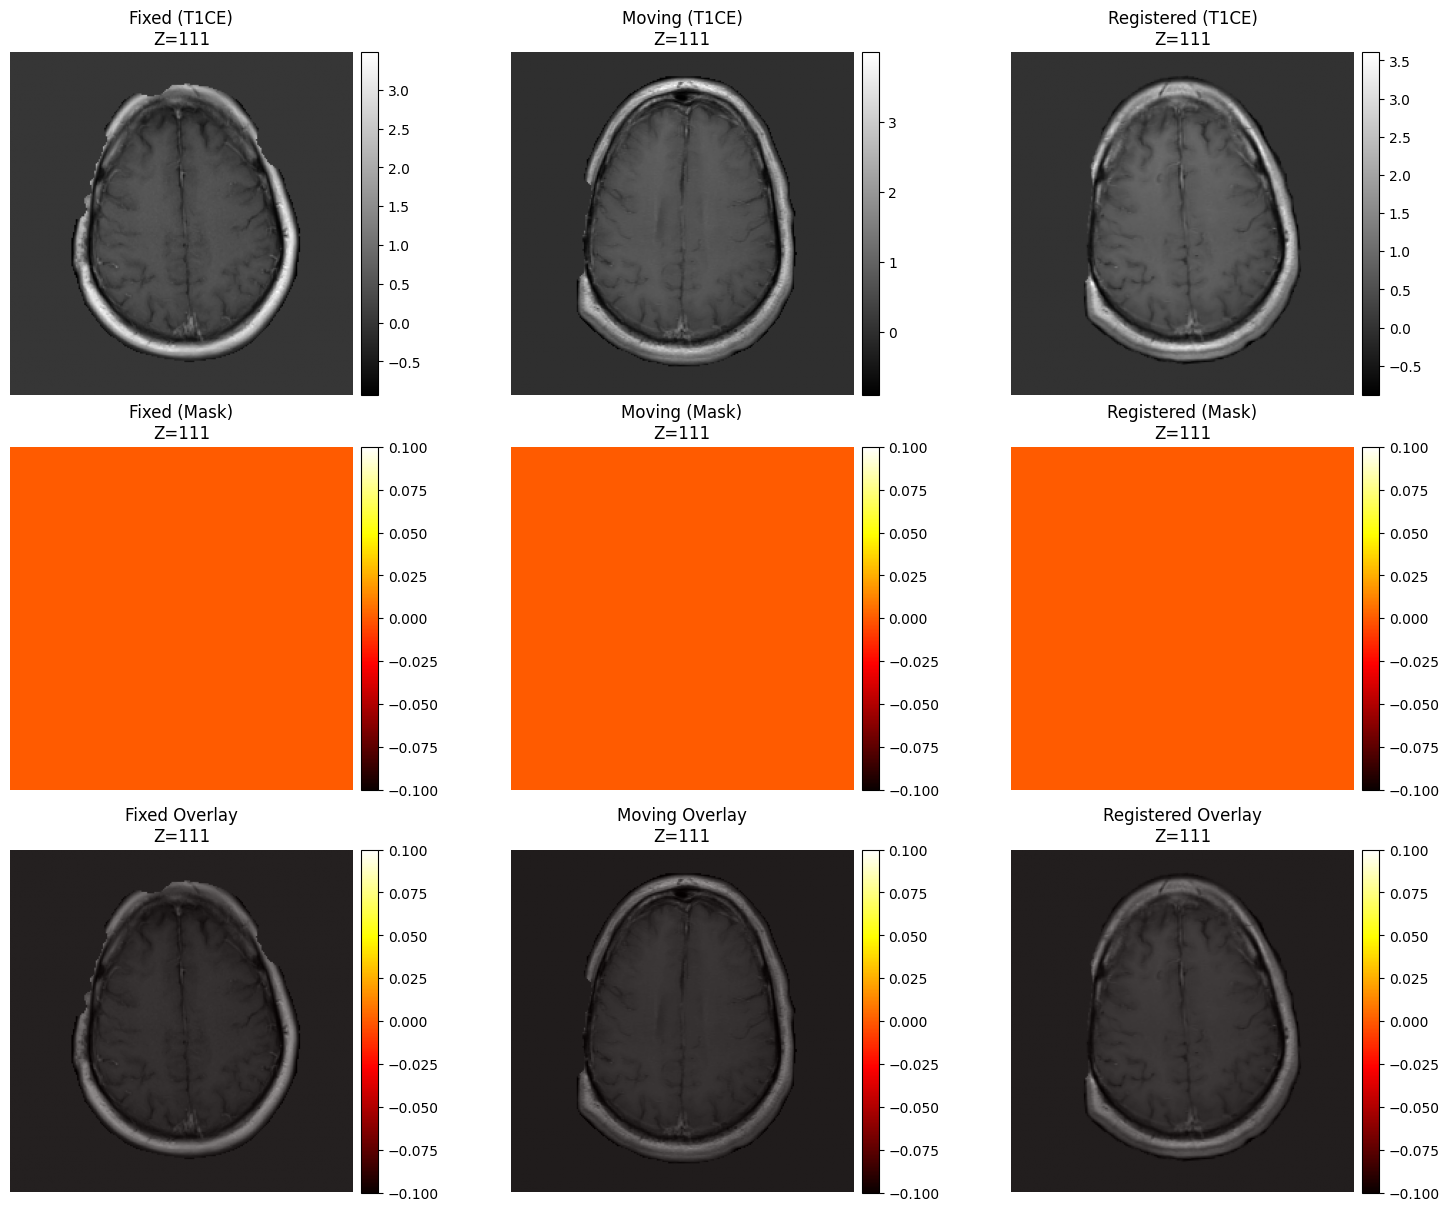

In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_registration_with_overlay(preproc_root, reg_root, case_id,
                                   fixed_date, moving_date,
                                   slice_z=111,
                                   img_mod="t1ce_brain.nii.gz",
                                   reg_img="t1ce2fixed_affine.nii.gz",
                                   mask_name="mask.nii.gz",
                                   reg_mask="mask2fixed_affine.nii.gz"):
    """
    Displays 3x3 grid:
    Row 1: T1CE Fixed, Moving, Registered images
    Row 2: Mask Fixed, Moving, Registered masks
    Row 3: Overlay of image+mask for Fixed, Moving, Registered
    """
    # Paths
    fixed_img_path   = os.path.join(reg_root, case_id, fixed_date,  img_mod)
    moving_img_path  = os.path.join(reg_root, case_id, moving_date, img_mod)
    reg_img_path     = os.path.join(reg_root, case_id, moving_date, reg_img)
    fixed_mask_path  = os.path.join(preproc_root, case_id, fixed_date,  mask_name)
    moving_mask_path = os.path.join(preproc_root, case_id, moving_date, mask_name)
    reg_mask_path    = os.path.join(reg_root, case_id, moving_date, reg_mask)

    # Load volumes
    fixed_img   = nib.load(fixed_img_path).get_fdata()
    moving_img  = nib.load(moving_img_path).get_fdata()
    reg_img_vol = nib.load(reg_img_path).get_fdata()
    fixed_mask  = nib.load(fixed_mask_path).get_fdata()
    moving_mask = nib.load(moving_mask_path).get_fdata()
    reg_mask_vol= nib.load(reg_mask_path).get_fdata()

    # Select slice
    Z, Y, X = fixed_img.shape
    z0 = slice_z if slice_z is not None else Z // 2

    img_slices  = [fixed_img[z0,:,:], moving_img[z0,:,:], reg_img_vol[z0,:,:]]
    mask_slices = [fixed_mask[z0,:,:], moving_mask[z0,:,:], reg_mask_vol[z0,:,:]]

    # Plot 3x3
    fig, axes = plt.subplots(3, 3, figsize=(15, 12), constrained_layout=True)
    titles = ["Fixed", "Moving", "Registered"]

    # Row 1: images
    for i, ax in enumerate(axes[0]):
        im = ax.imshow(img_slices[i], cmap="gray", aspect="equal")
        ax.set_title(f"{titles[i]} (T1CE)\nZ={z0}")
        ax.axis("off")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.02)

    # Row 2: masks
    for i, ax in enumerate(axes[1]):
        im = ax.imshow(mask_slices[i], cmap="hot", aspect="equal")
        ax.set_title(f"{titles[i]} (Mask)\nZ={z0}")
        ax.axis("off")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.02)

    # Row 3: overlay
    for i, ax in enumerate(axes[2]):
        ax.imshow(img_slices[i], cmap="gray", aspect="equal")
        ax.imshow(mask_slices[i], cmap="hot", alpha=0.4, aspect="equal")
        ax.set_title(f"{titles[i]} Overlay\nZ={z0}")
        ax.axis("off")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.02)

    plt.show()


# ───────── 사용 예 ─────────
preproc_root = "/mnt/ssd/brain-tumor-prediction/data/btp_preproc"
reg_root     = "/mnt/ssd/brain-tumor-prediction/data/btp_reg_flirt_t1ce"
case_id      = "PGBM-003"
fixed_date   = "1995-03-29"
moving_date  = "1995-10-17"

show_registration_with_overlay(preproc_root, reg_root, case_id,
                               fixed_date, moving_date,
                               slice_z=111)
